In [26]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from utils_functions import MLFunctions

from sklearn.utils import shuffle
from random import randint
import seaborn as sns

In [28]:
rf_instance = RandomForestClassifier(random_state=42)
lr_instance = LogisticRegression(random_state=42)
gb_instance = GradientBoostingClassifier(random_state=42)
svm_instance = SVC(random_state=42, probability=True)
xgboost_instance = XGBClassifier()

In [29]:
df_data = pd.read_csv("StandardScaler/X_train_StandardScaler.csv")
df_data = df_data.fillna(df_data.mean())

In [30]:
df_data["label_gdm"].value_counts()

label_gdm
0    966
1    198
Name: count, dtype: int64

- Under sampling

In [31]:
df_positive = df_data[df_data["label_gdm"] == 1]
df_negative = df_data[df_data["label_gdm"] == 0]

In [41]:
random_values = [randint(0, 1000) for i in range(1000)]
random_values = list(set(random_values))
len(random_values)

622

In [42]:
list_df_metrics = []

for index in range(100):
    df_subsample_negative = shuffle(df_negative, random_state=random_values[index], n_samples=len(df_positive))
    df_concat = pd.concat([df_subsample_negative, df_positive], axis=0)
    df_values = df_concat.drop(columns=["label_gdm"]).values
    response = df_concat["label_gdm"].values

    X_train, X_val, y_train, y_val = train_test_split(df_values, response, stratify=response, random_state=index, test_size=.2)

    rf_instance = MLFunctions.train_model(rf_instance, X_train, y_train)
    lr_instance = MLFunctions.train_model(lr_instance, X_train, y_train)
    gb_instance = MLFunctions.train_model(gb_instance, X_train, y_train)
    svm_instance = MLFunctions.train_model(svm_instance, X_train, y_train)
    xgboost_instance = MLFunctions.train_model(xgboost_instance, X_train, y_train)

    list_metrics = [
        MLFunctions.get_metrics(X_val, y_val, rf_instance, "RandomForest"),
        MLFunctions.get_metrics(X_val, y_val, lr_instance, "LogisticRegression"),
        MLFunctions.get_metrics(X_val, y_val, gb_instance, "GradientBoosting"),
        MLFunctions.get_metrics(X_val, y_val, svm_instance, "SVC"),
        MLFunctions.get_metrics(X_val, y_val, xgboost_instance, "XGB"),
    ]

    df_metrics_val = pd.DataFrame(list_metrics)
    df_metrics_val["random_seed"] = random_values[index]
    list_df_metrics.append(df_metrics_val)


In [43]:
df_full_exploring = pd.concat(list_df_metrics, axis=0)
df_full_exploring

,model_name,accuracy,f1_score,roc_auc,precision,recall,random_seed
0,RandomForest,0.5625,0.556962,0.607188,0.564103,0.550,1
1,LogisticRegression,0.5875,0.582278,0.670000,0.589744,0.575,1
2,GradientBoosting,0.5750,0.575000,0.656875,0.575000,0.575,1
3,SVC,0.5875,0.592593,0.570937,0.585366,0.600,1
4,XGB,0.6000,0.589744,0.611875,0.605263,0.575,1
...,...,...,...,...,...,...,...
0,RandomForest,0.6000,0.627907,0.613438,0.586957,0.675,150
1,LogisticRegression,0.5500,0.571429,0.596250,0.545455,0.600,150
2,GradientBoosting,0.4875,0.493827,0.589375,0.487805,0.500,150
3,SVC,0.5875,0.620690,0.596875,0.574468,0.675,150


<Axes: xlabel='precision'>

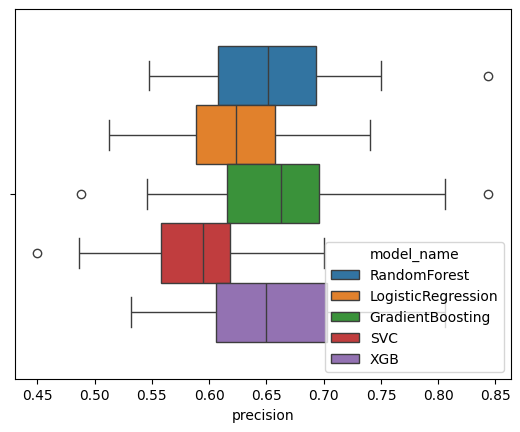

In [45]:
sns.boxplot(data=df_full_exploring, x="precision", hue="model_name")

<Axes: xlabel='precision', ylabel='Count'>

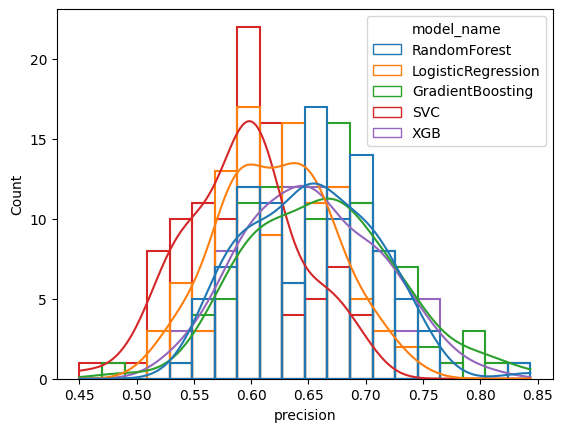

In [47]:
sns.histplot(data=df_full_exploring, x="precision", hue="model_name", fill=False, kde=True)